In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

### Q1

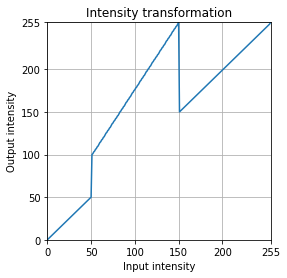

In [3]:
#create intensity tranformation piecewise
t1 = np.linspace(0, 50, 50+1)
t2 = np.linspace(100, 255, 100)
t3 = np.linspace(150, 255, 105)

t = np.concatenate((t1, t2, t3)).astype(np.uint8)
assert len(t) == 256

fig, ax = plt.subplots(figsize = (4,4))
ax.plot(t)
ax.set_xlabel("Input intensity")
ax.set_ylabel("Output intensity")
ax.set_title("Intensity transformation")

ax.set_xlim(0,255)
ax.set_ylim(0,255)

ax.set_xticks((0,50,100,150,200,255))
ax.set_xticklabels((0,50,100,150,200,255))
ax.set_yticks((0,50,100,150,200,255))
ax.set_yticklabels((0,50,100,150,200,255))

ax.grid()
plt.show()

Text(0.5, 1.0, 'Intensity transformed image')

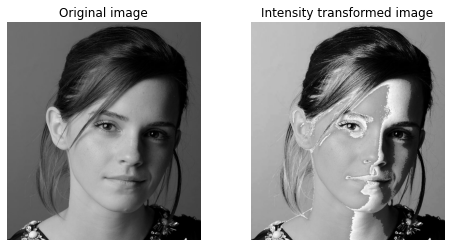

In [4]:
f = cv.imread('Images\emma_gray.jpg')
g = cv.LUT(f, t)

f_rgb = cv.cvtColor(f, cv.COLOR_BGR2RGB)
g_rgb = cv.cvtColor(g, cv.COLOR_BGR2RGB)

fig,ax = plt.subplots(1,2 , figsize=(8,4))
ax[0].imshow(f_rgb)
ax[0].axis('off')
ax[0].set_title("Original image")

ax[1].imshow(g_rgb)
ax[1].axis('off')
ax[1].set_title("Intensity transformed image")


### Q2

Finding the range of values

In [ ]:
f = cv.imread('Images/brain_proton_density_slice.png')
assert f is not None

for i in range(10):
    t1 = np.linspace(0, 25*i, 25*i+1)
    t2 = 0*np.ones(25)
    t3 = np.linspace(25*(i+1), 255, 255-25*(i+1))
    t = np.concatenate((t1,t2,t3)).astype(np.uint8)
    assert len(t) == 256

    fig, ax = plt.subplots(1,3, figsize = (12, 4))
    ax[0].plot(t)
    ax[0].set_xlabel("Input intensity")
    ax[0].set_ylabel("Output intensity")
    ax[0].set_title("Intensity transformation")

    ax[0].set_xlim(0,255)
    ax[0].set_ylim(0,255)
    
    ax[0].set_xticks((0,50,100,150,200,255))
    ax[0].set_xticklabels((0,50,100,150,200,255))
    ax[0].set_yticks((0,50,100,150,200,255))
    ax[0].set_yticklabels((0,50,100,150,200,255))

    ax[0].grid()

    g = cv.LUT(f, t)
    g = cv.cvtColor(g, cv.COLOR_RGB2BGR)
    
    ax[1].imshow(f)
    ax[1].axis('off')
    ax[1].grid()

    ax[2].imshow(g)
    ax[2].axis('off')
    ax[2].grid()

    
    plt.show()

a) White matter

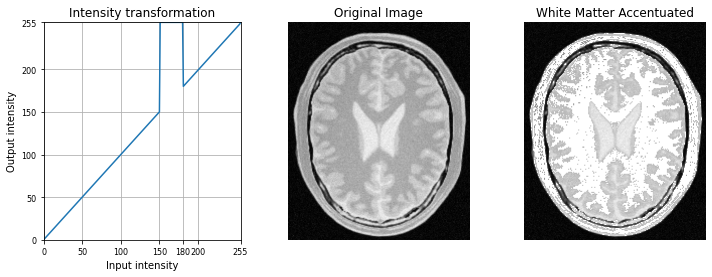

In [16]:
f = cv.imread('Images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert f is not None

t1 = np.linspace(0, 150, 150+1)
t2 = 255*np.ones(30)
t3 = np.linspace(180, 255, 255-180)
t = np.concatenate((t1,t2,t3)).astype(np.uint8)
assert len(t) == 256

fig, ax = plt.subplots(1,3, figsize = (12, 4))
ax[0].plot(t)
ax[0].set_xlabel("Input intensity")
ax[0].set_ylabel("Output intensity")
ax[0].set_title("Intensity transformation")

ax[0].set_xlim(0,255)
ax[0].set_ylim(0,255)

ax[0].set_xticks((0,50,100,150,180,200,255))
ax[0].set_xticklabels((0,50,100,150,180,200,255),fontsize="8")
ax[0].set_yticks((0,50,100,150,200,255))
ax[0].set_yticklabels((0,50,100,150,200,255),fontsize="8")

ax[0].grid()

g = cv.LUT(f, t)

f = cv.cvtColor(f, cv.COLOR_BGR2RGB)
g = cv.cvtColor(g, cv.COLOR_BGR2RGB)

ax[1].imshow(f)
ax[1].axis('off')
ax[1].set_title("Original Image")

ax[2].imshow(g)
ax[2].axis('off')
ax[2].set_title("White Matter Accentuated")


plt.show()


b) Gray matter

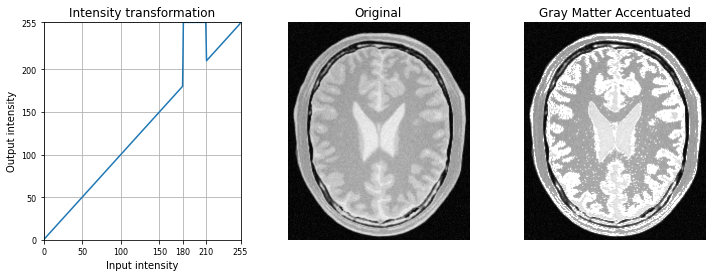

In [17]:
f = cv.imread('Images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert f is not None

t1 = np.linspace(0, 180, 180+1)
t2 = 255*np.ones(210-180)
t3 = np.linspace(210,255,255-210)
t = np.concatenate((t1,t2,t3)).astype(np.uint8)
assert len(t) == 256

fig, ax = plt.subplots(1,3, figsize = (12, 4))
ax[0].plot(t)
ax[0].set_xlabel("Input intensity")
ax[0].set_ylabel("Output intensity")
ax[0].set_title("Intensity transformation")

ax[0].set_xlim(0,255)
ax[0].set_ylim(0,255)

ax[0].set_xticks((0,50,100,150,180,210,255))
ax[0].set_xticklabels((0,50,100,150,180,210,255),fontsize="8")
ax[0].set_yticks((0,50,100,150,200,255))
ax[0].set_yticklabels((0,50,100,150,200,255),fontsize="8")

ax[0].grid()

g = cv.LUT(f, t)

f = cv.cvtColor(f, cv.COLOR_BGR2RGB)
g = cv.cvtColor(g, cv.COLOR_BGR2RGB)

ax[1].imshow(f)
ax[1].axis('off')
ax[1].set_title("Original")


ax[2].imshow(g)
ax[2].axis('off')
ax[2].set_title("Gray Matter Accentuated")


plt.show()


### Q3

a)

[]

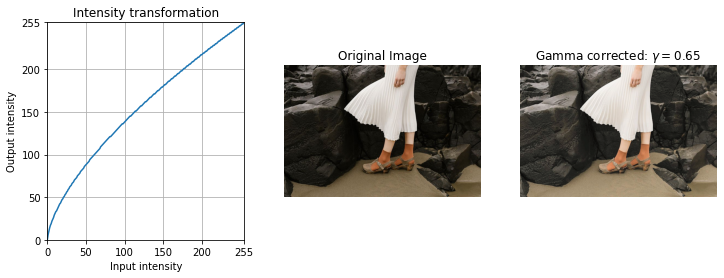

In [92]:
im = cv.imread("Images\highlights_and_shadows.jpg")
im_rgb = cv.cvtColor(im, cv.COLOR_BGR2RGB)

f = cv.cvtColor(im, cv.COLOR_BGR2LAB)
L,a,b = cv.split(f)

g = 0.65

t = np.array([(i/255)**g*255 for i in range(0,256)], dtype = np.uint8)
L_corrected = cv.LUT(L, t)

f_new = cv.merge((L_corrected, a, b))
f_new_rgb = cv.cvtColor(f_new, cv.COLOR_LAB2RGB)

fig, axs = plt.subplots(1,3,figsize=(12,4))

axs[0].plot(t)
axs[0].set_xlabel("Input intensity")
axs[0].set_ylabel("Output intensity")
axs[0].set_title("Intensity transformation")

axs[0].set_xlim(0,255)
axs[0].set_ylim(0,255)

axs[0].set_xticks((0,50,100,150,200,255))
axs[0].set_xticklabels((0,50,100,150,200,255))
axs[0].set_yticks((0,50,100,150,200,255))
axs[0].set_yticklabels((0,50,100,150,200,255))
axs[0].grid()

axs[1].imshow(im_rgb)
axs[1].set_title('Original Image')
axs[1].axis('off')

axs[2].imshow(f_new_rgb)
axs[2].set_title('Gamma corrected: $\gamma ={}$'.format(g))
axs[2].axis('off')
plt.plot()



b)

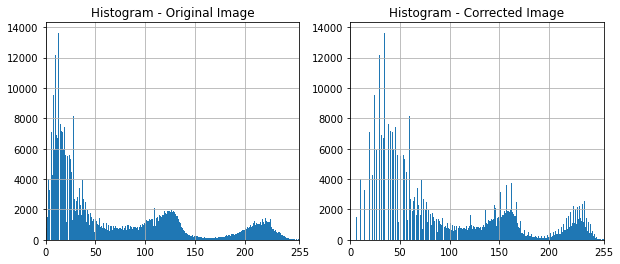

In [93]:
fig, axs = plt.subplots(1,2,figsize=(10,4))

axs[0].hist(L.flatten(), 256, [0, 256])
axs[0].set_title("Histogram of Original Image")
axs[0].set_xlim(0,255)
#axs[0].set_ylim(0,12000)
axs[0].set_xticks((0,50,100,150,200,255))
axs[0].set_xticklabels((0,50,100,150,200,255))
axs[0].grid()

axs[1].hist(L_corrected.flatten(), 256, [0, 256])
axs[1].set_title("Histogram of Corrected Image")
axs[1].set_xlim(0,255)
#axs[1].set_ylim(0,12000)
axs[1].set_xticks((0,50,100,150,200,255))
axs[1].set_xticklabels((0,50,100,150,200,255))
axs[1].grid()

plt.show()


### Q4

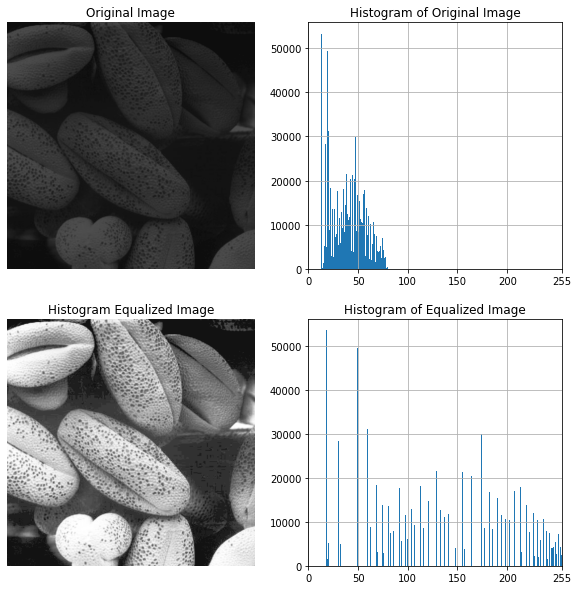

In [112]:
# read the image and find the number of occurences
f = cv.imread('Images/shells.png', cv.IMREAD_GRAYSCALE).astype(np.uint8)
hist, bins = np.histogram(f.ravel(), 256, [0, 256])

# code to carry out histogram equalization
m,n = f.shape
L = 256
t = np.round((L-1)/(m*n) * np.array([np.sum(hist[0:i+1]) for i in range(0,256)])).astype(np.uint8)
assert len(t) == 256
g = cv.LUT(f, t)

# plot the images
f = cv.cvtColor(f, cv.COLOR_BGR2RGB)
g = cv.cvtColor(g, cv.COLOR_BGR2RGB)

fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0,0].imshow(f, cmap = 'gray')
axs[0,0].axis('off')
axs[0,0].set_title("Original Image")
axs[1,0].imshow(g, cmap = 'gray')
axs[1,0].axis('off')
axs[1,0].set_title("Histogram Equalized Image")

axs[0,1].hist(f.flatten(), 256, [0, 256])
axs[0,1].set_title("Histogram of Original Image")
axs[0,1].set_xlim(0,255)
#axs[0,1].set_ylim(0,15000)
axs[0,1].set_xticks((0,50,100,150,200,255))
axs[0,1].set_xticklabels((0,50,100,150,200,255))
axs[0,1].grid()


axs[1,1].hist(g.flatten(), 256, [0, 256])
axs[1,1].set_title("Histogram of Equalized Image")
axs[1,1].set_xlim(0,255)
#axs[1,1].set_ylim(0,15000)
axs[1,1].set_xticks((0,50,100,150,200,255))
axs[1,1].set_xticklabels((0,50,100,150,200,255))
axs[1,1].grid()

plt.show()


### Q5

In [183]:
def zoom_image(image, scale, type):
    """
    Inputs: src, scale, type 
        type: 'nn' for nearest-neighbor, 'bi' for bilinear interpolation 
    """
    rows = int(np.round(image.shape[0]*scale))
    cols = int(np.round(image.shape[1]*scale))
    
    zoomed = np.zeros((rows, cols))

    if type == 'nn':
        for i in range(rows):
            for j in range(cols):
                ip = int(np.round(i/scale))
                jp = int(np.round(j/scale))

                if ip >= image.shape[0]: ip = image.shape[0] - 1
                if jp >= image.shape[1]: jp = image.shape[1] - 1

                zoomed[i][j] = image[ip][jp]
                

    if type =='bi':
        for i in range(rows):
            for j in range(cols):
                ip, jp = i/scale, j/scale
                i1, j1 = i//scale, j//scale
                i2, j2 = i//scale + 1, j//scale + 1

                if i2 >= image.shape[0]: i2 = image.shape[0] - 1
                if j2 >= image.shape[1]: j2 = image.shape[1] - 1

                val1 = image[i1][j1]*(i2-ip)+image[i2][j1]*(ip-i1) 
                val2 = image[i1][j2]*(i2-ip)+image[i2][j2]*(ip-i1) 

                val = val1*(j2-jp) + val2*(jp-j1)

                zoomed[i][j] = val
    
    return zoomed

In [188]:
images = ['Images/a1q5images/im01small.png', 'Images/a1q5images/im02small.png', 'Images/a1q5images/im03small.png' ]
originals = ['Images/a1q5images/im01.png', 'Images/a1q5images/im02.png', 'Images/a1q5images/im03.png' ]

a) Nearest Neighbor

[40 16 22]


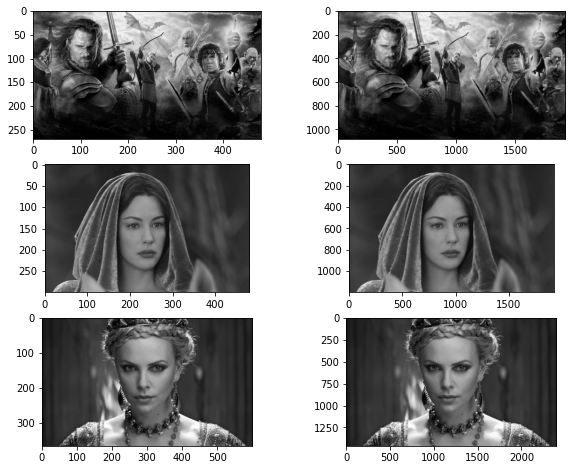

In [196]:
fig, axs = plt.subplots(3, 2, figsize=(10,8))
s = 4
SSD_nn = np.array([0,0,0])

for i in range(3):
    original = cv.imread(originals[i], cv.IMREAD_GRAYSCALE).astype(np.uint8)
    im = cv.imread(images[i], cv.IMREAD_GRAYSCALE).astype(np.uint8)

    im_zoomed = zoom_image(im, s, 'nn').astype(np.uint8)

    n,m = original.shape

    if i == 2:
        SSD_nn[i] = np.sum((im_zoomed[:-1][:] - original)**2)/(n*m)
    else:
        SSD_nn[i] = np.sum((im_zoomed - original)**2)/(n*m)


    im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
    im_zoomed = cv.cvtColor(im_zoomed, cv.COLOR_BGR2RGB)

    axs[i][0].imshow(im)
    axs[i][1].imshow(im_zoomed)

print(SSD_nn)

    # cv.imshow('original', im)
    # cv.waitKey(0)
    # cv.imshow('zoomed',im_zoomed)
    # cv.waitKey(0)
    # cv.destroyAllWindows()



b) Bilinear interpolation

[39 16 21]


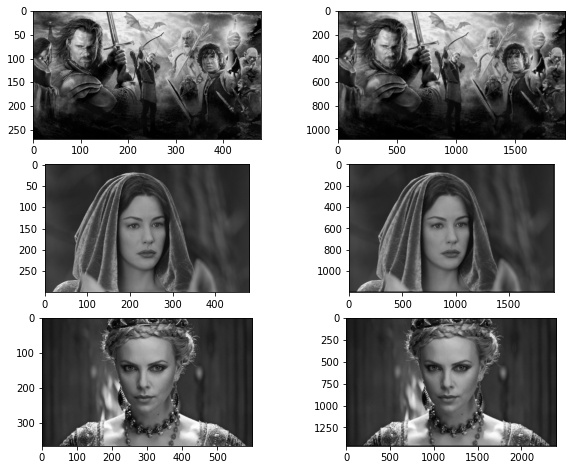

In [198]:
fig, axs = plt.subplots(3, 2, figsize=(10,8))
s = 4
SSD_bi = np.array([0,0,0])

for i in range(3):
    original = cv.imread(originals[i], cv.IMREAD_GRAYSCALE).astype(np.uint8)
    im = cv.imread(images[i], cv.IMREAD_GRAYSCALE).astype(np.uint8)

    im_zoomed = zoom_image(im, s, 'bi').astype(np.uint8)

    n,m = original.shape
    
    if i == 2:
        SSD_bi[i] = np.sum((im_zoomed[:-1][:] - original)**2)/(n*m)
    else:
        SSD_bi[i] = np.sum((im_zoomed - original)**2)/(n*m)
    
    im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
    im_zoomed = cv.cvtColor(im_zoomed, cv.COLOR_BGR2RGB)
    
    axs[i][0].imshow(im)
    axs[i][1].imshow(im_zoomed)
    
print(SSD_bi)
    

    # cv.imshow('original', im)
    # cv.waitKey(0)
    # cv.imshow('zoomed',im_zoomed)
    # cv.waitKey(0)
    # cv.destroyAllWindows()

### 

### Q6
a)

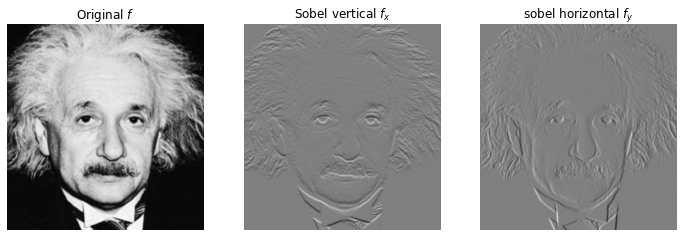

In [202]:
im = cv.imread('Images/einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert im is not None

sobel_v = np.array([[-1, -2, -1] , [0, 0, 0] , [1, 2, 1]] , dtype = np.float32 )
im_sobelv = cv.filter2D(im, -1, sobel_v )

sobel_h = np.array([[-1, 0, 1] , [-2, 0, 2] , [-1, 0, 1]] , dtype = np.float32 )
im_sobelh = cv.filter2D(im, -1, sobel_h )

fig, ax = plt.subplots(1,3, figsize=(12,6))

ax[0].imshow(im, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title('Original $f$')

ax[1].imshow(im_sobelv, cmap = 'gray', vmin = -1020, vmax = 1020)
ax[1].set_title('Sobel vertical $f_x$')

ax[2].imshow(im_sobelh, cmap = 'gray', vmin = -1020, vmax = 1020)
ax[2].set_title('sobel horizontal $f_y$')

for i in range(3):
    ax[i].axis('off')

plt.show()

b)

In [220]:
def filter(image, kernel):
    assert kernel.shape[0] % 2 and kernel.shape[1] % 2
    h_gap, w_gap = kernel.shape[0]//2, kernel.shape[1]//2
    h, w = image.shape
    result = np.zeros(image.shape, dtype = np.float32)



    for i in range(h_gap, h-h_gap):
        for j in range(w_gap, w-w_gap):
            result[i][j] = np.dot(image[i-h_gap:i+h_gap+1, j-w_gap:j+w_gap+1].flatten(), kernel.flatten())
    
    return result



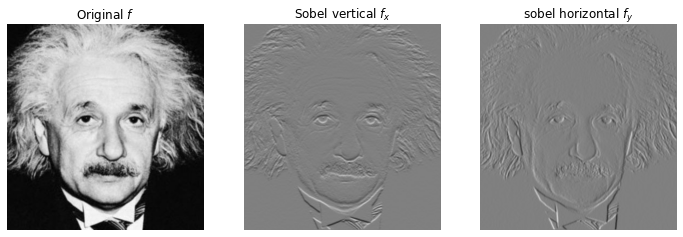

In [234]:
im = cv.imread('Images/einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert im is not None

sobel_v = np.array([[-1, -2, -1] , [0, 0, 0] , [1, 2, 1]] , dtype = np.float32)
im_sobelv = filter(im, sobel_v)

sobel_h = np.array([[-1, 0, 1] , [-2, 0, 2] , [-1, 0, 1]] , dtype = np.float32)
im_sobelh = filter(im, sobel_h)

fig, ax = plt.subplots(1,3, figsize=(12,6))

ax[0].imshow(im, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title('Original $f$')

ax[1].imshow(im_sobelv, cmap = 'gray', vmin = -1020, vmax = 1020)
ax[1].set_title('Sobel vertical $f_x$')

ax[2].imshow(im_sobelh, cmap = 'gray', vmin = -1020, vmax = 1020)
ax[2].set_title('sobel horizontal $f_y$')

for i in range(3):
    ax[i].axis('off')

plt.show()

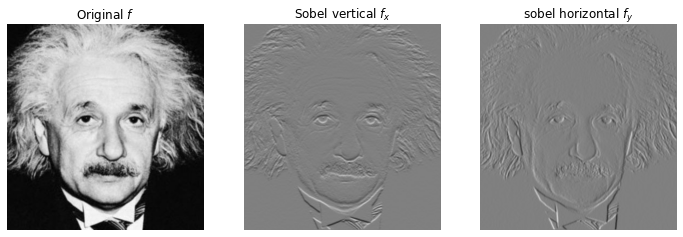

In [235]:
im = cv.imread('Images/einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert im is not None

k1_v = np.array([[-1],[0],[1]], dtype = np.float32)
im_intermediate_v = filter(im, k1_v)
k2_v = np.array([[1, 2, 1]] , dtype = np.float32)
im_sobelv = filter(im_intermediate_v, k2_v)

k1_h = np.array([[1], [2], [1]], dtype = np.float32)
im_intermediate_h = filter(im, k1_h)
k2_h = np.array([[-1, 0, 1]] , dtype = np.float32)
im_sobelh = filter(im_intermediate_h, k2_h)

fig, ax = plt.subplots(1,3, figsize=(12,6))

ax[0].imshow(im, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title('Original $f$')

ax[1].imshow(im_sobelv, cmap = 'gray', vmin = -1020, vmax = 1020)
ax[1].set_title('Sobel vertical $f_x$')

ax[2].imshow(im_sobelh, cmap = 'gray', vmin = -1020, vmax = 1020)
ax[2].set_title('sobel horizontal $f_y$')

for i in range(3):
    ax[i].axis('off')

plt.show()

### Q7

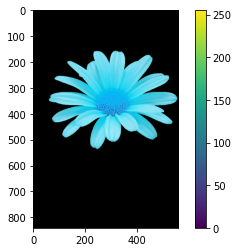

In [268]:
img = cv.imread('Images/daisy.jpg')
mask = np.zeros(img.shape[:2], np.uint8)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
rect = (60, 150, 500, 400)
cv.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')
img = img * mask2[:,:,np.newaxis]

plt.imshow(img)
plt.colorbar()
plt.show()

[]

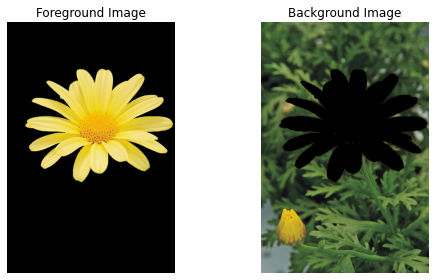

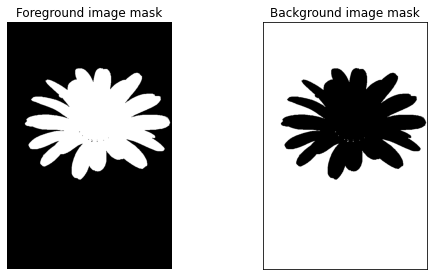

In [288]:
#Read the image using opencv
img = cv.imread('images/daisy.jpg', cv.IMREAD_COLOR)
assert img is not None

mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (60, 150, 500, 400)
cv.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)

#foreground image
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_f = img * mask2[:, :, np.newaxis]

#backgroung image
mask3 = np.where((mask==1)|(mask==3),0,1).astype('uint8')
img_b = img * mask3[:, :, np.newaxis]

fig, ax = plt.subplots(1, 2, figsize=(8,4))

img_f_rgb = cv.cvtColor(img_f, cv.COLOR_BGR2RGB)
ax[0].imshow(img_f_rgb)
ax[0].set_title("Foreground Image")
ax[0].axis('off')

img_b_rgb = cv.cvtColor(img_b,cv.COLOR_BGR2RGB)
ax[1].imshow(img_b_rgb)
ax[1].set_title("Background Image")
ax[1].axis('off')

fig,ax = plt.subplots(1,2,figsize=(8,4))

ax[0].set_title("Foreground image mask")
ax[0].imshow(mask2, cmap='gray')
ax[0].axis('off')

ax[1].set_title("Background image mask")
ax[1].imshow(mask3, cmap='gray')
ax[1].set_xticks([]); ax[1].set_yticks([])

plt.plot()

[]

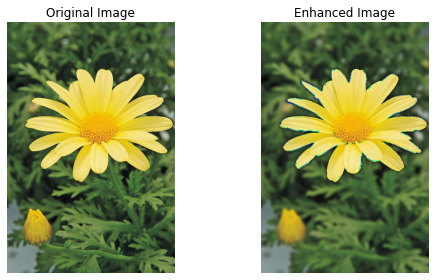

In [298]:
img = cv.imread('images/daisy.jpg', cv.IMREAD_COLOR)
assert img is not None

a = 13
sigma = 7
blured_b = cv.GaussianBlur(img_b, (a, a), sigma)
enhanced = img_f + blured_b

fig, axs = plt.subplots(1,2,figsize=(8,4))

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
axs[0].imshow(img)
axs[0].set_title("Original Image")
axs[0].axis('off')


enhanced = cv.cvtColor(enhanced, cv.COLOR_BGR2RGB)
axs[1].imshow(enhanced)
axs[1].set_title("Enhanced Image")
axs[1].axis('off')

plt.plot()
